In [218]:
words = open('names.txt', 'r').read().splitlines()
chars = list(set(''.join(words)))
chars.sort()
ctoi = {c: i + 1 for i, c in enumerate(chars)}
ctoi["."] = 0
itoc = {i: c for c, i in ctoi.items()}

In [219]:
import torch
context_size = 3
xs = []
ys = []

for word in words:
    context = [0] * context_size
    for char in word:
        xs.append(context)
        ys.append(ctoi[char])
        context = context[1:] + [ctoi[char]]
    
    xs.append(context)
    ys.append(0)


xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [220]:
train_size = int(xs.shape[0] * 0.8)
dev_size = int(xs.shape[0] * 0.1)

train_xs = xs[:train_size]
train_ys = ys[:train_size]

dev_xs = xs[train_size:train_size + dev_size]
dev_ys = ys[train_size:train_size + dev_size]

test_xs = xs[train_size + dev_size:]
test_ys = ys[train_size + dev_size:]

In [221]:
C = torch.randn((27, 10), requires_grad=True)
W1 = torch.randn((30, 200), requires_grad=True)
B1 = torch.randn((200), requires_grad=True)
W2 = torch.randn((200, 27), requires_grad=True)
B2 = torch.randn((27), requires_grad=True)
params = [C, W1, B1, W2, B2]

In [222]:
lre = torch.linspace(0, 1 ,1000)

In [223]:
import torch.nn.functional as F
lr_stats = []
loss_stats = []
for i in range(100000):
    #minibatch
    mini_batch = torch.randint(0, train_xs.shape[0 ], (300,))

    embed = C[train_xs[mini_batch]]
    firt_layer_logits = torch.tanh(embed.view(-1,30) @ W1 + B1)
    second_layer_logits = firt_layer_logits @ W2 + B2
    loss = F.cross_entropy(second_layer_logits, train_ys[mini_batch])
    # print(loss.item())

    # backward
    for p in params:
        p.grad = None

    loss.backward()

    # lr = lre[i]
    for p in params:
        p.data += -0.000001 * p.grad

    # lr_stats.append(lr)
    loss_stats.append(loss.item())

print(loss.item())

25.037670135498047


In [224]:
embed = C[test_xs]
firt_layer_logits = torch.tanh(embed.view(-1,30) @ W1 + B1)
second_layer_logits = firt_layer_logits @ W2 + B2
loss = F.cross_entropy(second_layer_logits, test_ys)
print(loss.item())

24.86594581604004


ValueError: x and y must have same first dimension, but have shapes (0,) and (100000,)

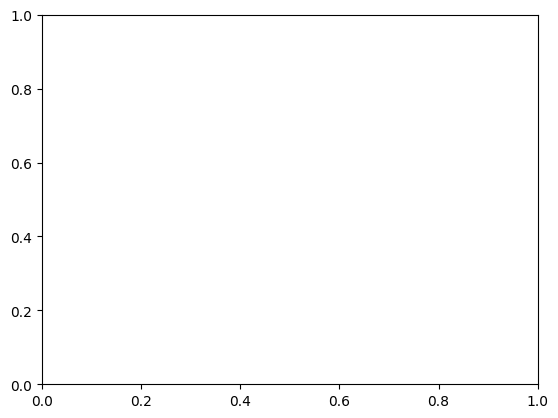

In [225]:
from matplotlib import pyplot as plt
plt.plot(lr_stats, loss_stats)

In [ ]:
for i in range(15):
    word = []
    idxs = [0] * context_size
    while True:
        embed = C[torch.tensor([idxs])]
        firt_layer_logits = torch.tanh(embed.view(-1,30) @ W1 + B1)
        second_layer_logits = firt_layer_logits @ W2 + B2
        probs = F.softmax(second_layer_logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        word.append(itoc[ix])
        if ix == 0:
            break
        
        idxs = idxs[1:] + [ix]
    
    print("".join(word))





zayla.
tavik.
kawardia.
skylean.
raelia.
casea.
alinnleighby.
saijamsia.
serankaiyah.
jandi.
bevah.
shrie.
vaire.
kadali.
bernnley.
